In [ ]:
# This data represents several relationships in my project. Firstly, all prices in the data sets tend to rise over time.
# When comparing beef and pork prices, farm and wholesale have the strongest colinearity, therefore one should probably
# be excluded. We could then create a new variable, by dividing retail price by farm price to get a price ratio,
# which would eliminate any lingering colinearity. 

# Comparing pork and beef prices to each other shows high colinearity at the retail level, but less so at the farm and 
# wholesale level. This might be useful to know when predicting retail values, meaning we could use a similar model to
# predict the futur retail values of both.

# If we look at oil prices compared to any of the meat prices, the data does not appear to have a totally linear
# relationship. This might mean we need to run a higher order regression to get an accurate model, or we may have a
# confounding variable. It could be that grain prices provide the explanation for any variation from a strictly meat-oil
# relationship, and suggest we need a model that provides a meat-oil-grain relationship.

In [41]:
import numpy as np
import pandas as pd
import xlrd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import sklearn.linear_model
%matplotlib inline

In [2]:
# opening excel documents containing oil, meat, and grain prices
oil = xlrd.open_workbook('Downloads/Final_Project/Meat/spot_oil.xls')
meat = xlrd.open_workbook('Downloads/Final_Project/Meat/history.xls')
grains = xlrd.open_workbook('Downloads/Final_Project/Meat/fgyearbooktablesfull.xls')

In [3]:
# creating oil price dataframe
worksheet_oil = oil.sheet_by_name('Data 1')
oil_date = worksheet_oil.col_values(0)
oil_price = worksheet_oil.col_values(1)

In [4]:
data_oil = pd.DataFrame(columns=['date', 'oil_price'])

In [5]:
data_oil['date'] = oil_date
data_oil['oil_price'] = oil_price

In [6]:
data_oil.head(10)

,date,oil_price
0,Back to Contents,"Data 1: Cushing, OK WTI Spot Price FOB (Dollar..."
1,Sourcekey,RWTC
2,Date,"Cushing, OK WTI Spot Price FOB (Dollars per Ba..."
3,31427,22.93
4,31458,15.46
5,31486,12.61
6,31517,12.84
7,31547,15.38
8,31578,13.43
9,31608,11.59


In [7]:
data_oil.shape

(365, 2)

In [8]:
data_oil.dtypes

date         object
oil_price    object
dtype: object

In [9]:
# creating meat price dataframe
worksheet_beef = meat.sheet_by_name('beef')
date_beef = worksheet_beef.col_values(0)
farm_beef = worksheet_beef.col_values(2)
wholesale_beef = worksheet_beef.col_values(4)
retail_beef = worksheet_beef.col_values(5)

worksheet_pork = meat.sheet_by_name('pork')
farm_pork = worksheet_pork.col_values(2)
wholesale_pork = worksheet_pork.col_values(4)
retail_pork = worksheet_pork.col_values(5)

In [10]:
data_meat = pd.DataFrame(columns=['date', 'beef_farm_price', 'beef_wholesale_price', 'beef_retail_price',
                                  'pork_farm_price', 'pork_wholesale_price', 'pork_retail_price'])

In [11]:
data_meat['date'] = date_beef
data_meat['beef_farm_price'] = farm_beef
data_meat['beef_wholesale_price'] = wholesale_beef
data_meat['beef_retail_price'] = retail_beef
data_meat['pork_farm_price'] = farm_pork
data_meat['pork_wholesale_price'] = wholesale_pork
data_meat['pork_retail_price'] = retail_pork

In [12]:
data_meat.head(10)

,date,beef_farm_price,beef_wholesale_price,beef_retail_price,pork_farm_price,pork_wholesale_price,pork_retail_price
0,,,,,,,
1,,,,,,,
2,,,,,,,
3,,gross farm value,wholesale value,retail value,gross farm value,wholesale value,retail value
4,,C,E,F,C,E,F
5,25569,67.4,75.9,98.5,52.3,71.2,81.4
6,25600,69.8,75.6,98.3,53.9,70.4,81.1
7,25628,74,79.9,100.6,49.6,68,80.7
8,25659,73.4,79.2,101.1,45.9,65.2,79.3
9,25689,70.9,76.6,100.7,44.9,65.2,79.4


In [13]:
data_meat.shape

(557, 7)

In [14]:
data_meat.dtypes

date                    object
beef_farm_price         object
beef_wholesale_price    object
beef_retail_price       object
pork_farm_price         object
pork_wholesale_price    object
pork_retail_price       object
dtype: object

In [15]:
# creating grain price dataFrame
worksheet_grains = grains.sheet_by_name('FGYearbookTable01-Full')
grains_type = worksheet_grains.col_values(0)
grains_date = worksheet_grains.col_values(1)
grains_price = worksheet_grains.col_values(6)

In [16]:
data_grains = pd.DataFrame(columns=[ 'date', 'grain_type', 'grain_price'])

In [17]:
data_grains['date'] = grains_date
data_grains['grain_type'] = grains_type
data_grains['grain_price'] = grains_price

In [18]:
data_grains.head(10)

,date,grain_type,grain_price
0,,"Table 1--Corn, sorghum, barley, and oats: Plan...",
1,,Commodity and mkt yr 1/,Weighted-average farm price (dollars per bushe...
2,1866/67,Corn,0.657
3,1867/68,,0.781
4,1868/69,,0.617
5,1869/70,,0.725
6,1870/71,,0.521
7,1871/72,,0.464
8,1872/73,,0.383
9,1873/74,,0.483


In [19]:
data_grains.tail(10)

,date,grain_type,grain_price
547,2011/12,,3.49
548,2012/13,,3.89
549,2013/14,,3.75
550,2014/15,,3.21
551,2015/16,,2.10-2.20
552,,,
553,,"1/ Corn and sorghum, September-August; barley ...",
554,,do not include an allowance for loans outstand...,
555,,"Source: USDA, National Agricultural Statistics...",
556,,Data run: 3/10/2016,


In [20]:
data_grains.dtypes

date           object
grain_type     object
grain_price    object
dtype: object

In [21]:
# testing slice of meat dataframe and conversion to appropriate data type
data_meat['beef_farm_price'][5:].astype(float).dtypes

dtype('float64')

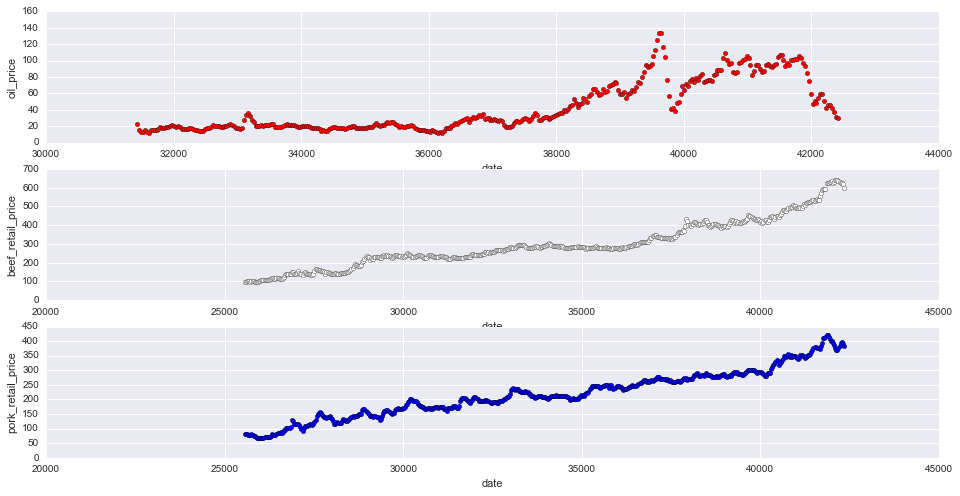

In [68]:
# plotting oil, beef retail, and pork retail over time - datetime not correctly transformed yet
fig, axs = plt.subplots(3, 1, sharey=False)
data_oil[3:].astype(float).plot(kind='scatter', x='date', y='oil_price', ax=axs[0], figsize=(16, 8), color='r')
data_meat[5:].astype(float).plot(kind='scatter', x='date', y='beef_retail_price', ax=axs[1], color='w')
data_meat[5:].astype(float).plot(kind='scatter', x='date', y='pork_retail_price', ax=axs[2],color='blue')

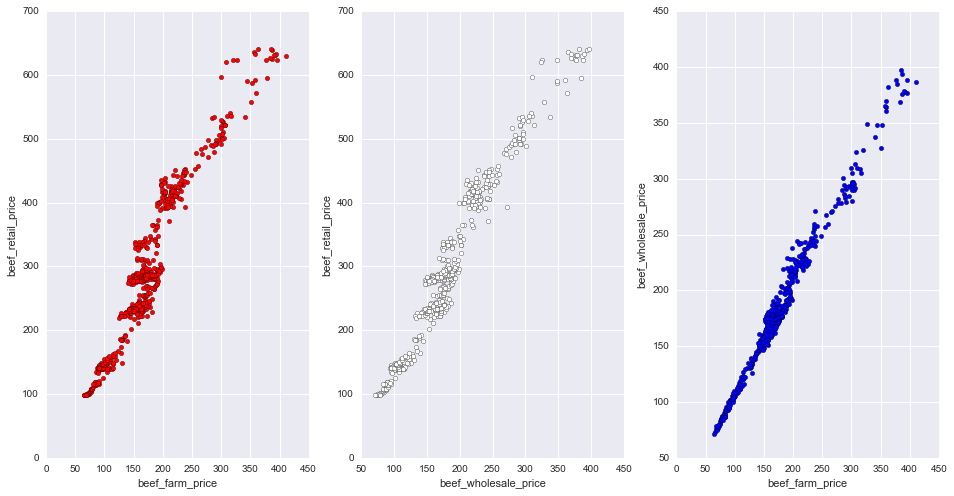

In [65]:
# plotting beef farm, wholesale and retail prices against each other
# this shows more colinearity between farm and wholesale prices
fig, axs = plt.subplots(1, 3, sharey=False)
data_meat[5:].astype(float).plot(kind='scatter', x='beef_farm_price', y='beef_retail_price', ax=axs[0], figsize=(16, 8), color='r')
data_meat[5:].astype(float).plot(kind='scatter', x='beef_wholesale_price', y='beef_retail_price', ax=axs[1], color='w')
data_meat[5:].astype(float).plot(kind='scatter', x='beef_farm_price', y='beef_wholesale_price', ax=axs[2],color='blue')

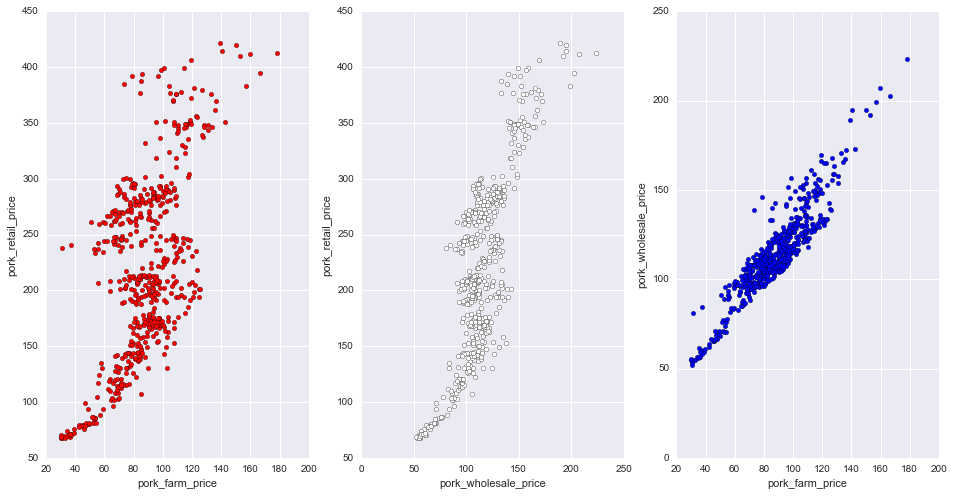

In [66]:
# plotting pork farm, wholesale and retail prices against each other
# this also shows stronger colinearity between farm and wholesale prices
fig, axs = plt.subplots(1, 3, sharey=False)
data_meat[5:].astype(float).plot(kind='scatter', x='pork_farm_price', y='pork_retail_price', ax=axs[0], figsize=(16, 8), color='r')
data_meat[5:].astype(float).plot(kind='scatter', x='pork_wholesale_price', y='pork_retail_price', ax=axs[1], color='w')
data_meat[5:].astype(float).plot(kind='scatter', x='pork_farm_price', y='pork_wholesale_price', ax=axs[2],color='blue')

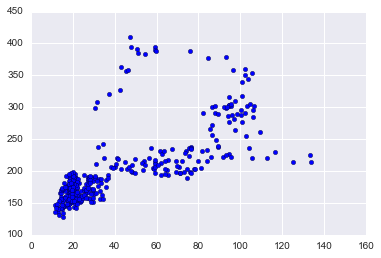

In [51]:
# plotting beef farm to oil price
plt.figure()
plt.scatter(
    data_oil['oil_price'][3:].astype(float),
    data_meat['beef_farm_price'][195:].astype(float),
)
plt.show()

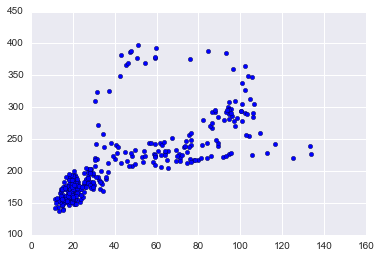

In [52]:
# plotting beef wholesale to oil price
plt.figure()
plt.scatter(
    data_oil['oil_price'][3:].astype(float),
    data_meat['beef_wholesale_price'][195:].astype(float),
)
plt.show()

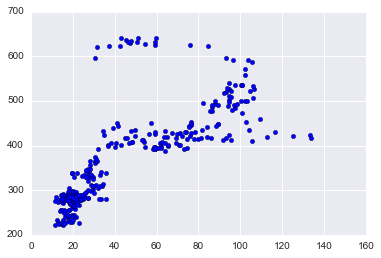

In [53]:
# plotting beef retail to oil price
plt.figure()
plt.scatter(
    data_oil['oil_price'][3:].astype(float),
    data_meat['beef_retail_price'][195:].astype(float),
)
plt.show()

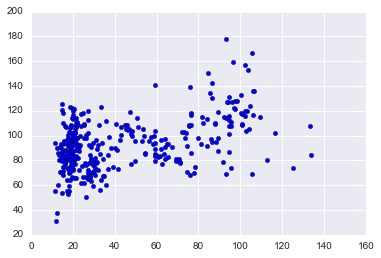

In [54]:
# plotting pork farm to oil price
plt.figure()
plt.scatter(
    data_oil['oil_price'][3:].astype(float),
    data_meat['pork_farm_price'][195:].astype(float)
)
plt.show()

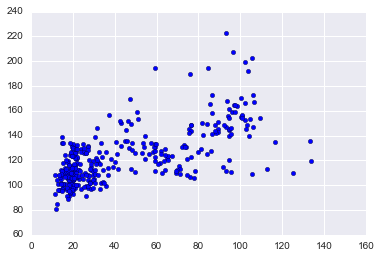

In [55]:
# plotting pork wholesale to oil price
plt.figure()
plt.scatter(
    data_oil['oil_price'][3:].astype(float),
    data_meat['pork_wholesale_price'][195:].astype(float)
)
plt.show()

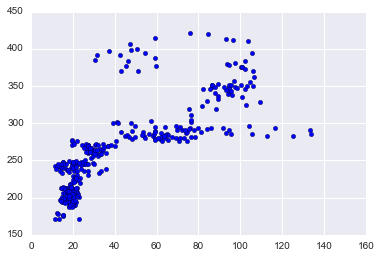

In [56]:
# plotting pork retail to oil price
plt.figure()
plt.scatter(
    data_oil['oil_price'][3:].astype(float),
    data_meat['pork_retail_price'][195:].astype(float)
)
plt.show()

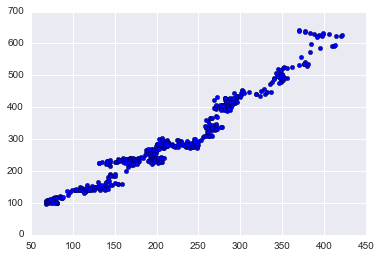

In [57]:
# plotting beef retail to pork retail price
plt.figure()
plt.scatter(
    data_meat['pork_retail_price'][5:].astype(float),
    data_meat['beef_retail_price'][5:].astype(float)
)
plt.show()

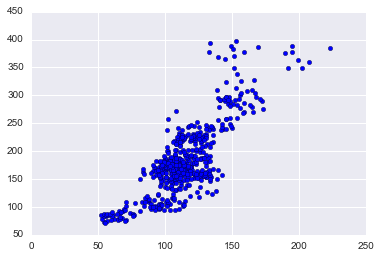

In [58]:
# plotting beef wholesale to pork wholesale price
plt.figure()
plt.scatter(
    data_meat['pork_wholesale_price'][5:].astype(float),
    data_meat['beef_wholesale_price'][5:].astype(float)
)
plt.show()

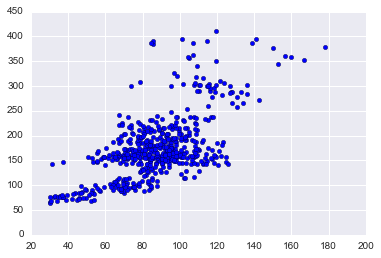

In [59]:
# plotting beef farm to pork farm price
plt.figure()
plt.scatter(
    data_meat['pork_farm_price'][5:].astype(float),
    data_meat['beef_farm_price'][5:].astype(float)
)
plt.show()

In [72]:
# plotting grain price over time
# must transform date column into a numeric value, as '1866/67' will not transform using .astype(float)
plt.figure()
plt.scatter(
    data_grains['date'][2:552].real.astype(float),
    data_grains['grain_price'][2:552].real.astype(float)
)
plt.show()

ValueError: invalid literal for float(): 2015/16